In [2]:
import csv
import numpy as np
import pandas as pd
from pandas import DataFrame
from numpy import nan as NA

## PreProcessing / Analysis

In [3]:
def replaceNaN(ser, country, latLon, mean):
    if pd.isnull(ser.values[latLon]):
        ser.values[latLon] = round(country.loc[ser.values[1]][mean],2)
    return ser

euCityTempsFile = open('EuCitiesTemperatures.csv')
euCityTemps = pd.read_csv(euCityTempsFile)
country = euCityTemps.groupby('country').mean()
euCityTemps = euCityTemps.apply(lambda x: replaceNaN(x, country,5,1), axis = 1)
euCityTemps = euCityTemps.apply(lambda x: replaceNaN(x, country, 6, 2), axis = 1)
euCityTemps

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


In [4]:
def latLonCheck(ser):
    if ser.values[5] >= 40 and ser.values[5] <= 60:
        if(ser.values[6] >= 15 and ser.values[6] <= 30):
            return ser

country = euCityTemps.apply(lambda x: latLonCheck(x), axis = 1)
countryCount = country.groupby('country').count()['city']
countryCount[countryCount == countryCount.max()]

country
Poland     9
Romania    9
Name: city, dtype: int64

In [5]:
regions = euCityTemps.groupby(['EU','coastline']).mean()

def fillTemp(ser):
    isEU = ser.values[3]
    isCoast = ser.values[4]
    if pd.isnull(ser.values[7]):
        ser.values[7] = regions.loc[isEU,isCoast]['temperature']
    return ser
euCityTemps = euCityTemps.apply(lambda x: fillTemp(x), axis = 1)
euCityTemps

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.180000
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.481538
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.540000
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.910000
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.790000
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.314494
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.140000
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.000000
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.600000


## Visualization

In [6]:
from matplotlib import pyplot as plt

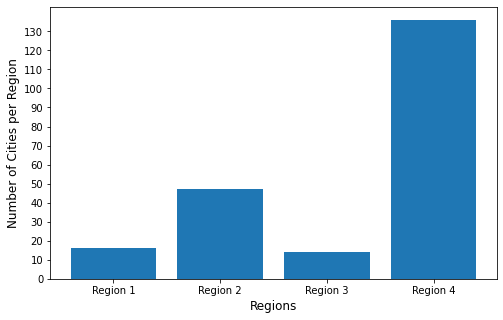

In [10]:
regionCount = euCityTemps.groupby(['EU','coastline']).count()['city']
plt.figure(figsize=(8,5))
plt.bar(range(len(regionCount)),regionCount)
#Region1: EU = no, coastline = no
#Region2: EU = no, coastline = yes
#Region3: EU = yes, coastline = no
#Region4: EU = yes, coastline = yes
regions = ['Region 1', 'Region 2', 'Region 3', 'Region 4']
plt.xticks(range(len(regionCount)), regions)
plt.yticks(range(0,regionCount.max(),10))
plt.xlabel('Regions',fontsize=12)
plt.ylabel('Number of Cities per Region',fontsize=12)
plt.show()

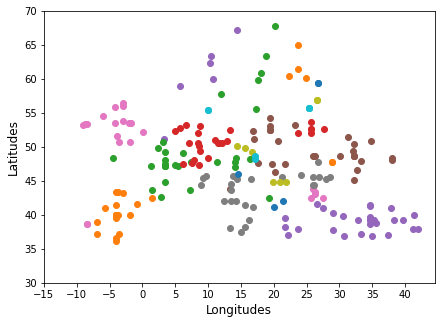

In [11]:
countryLatLon = euCityTemps.groupby(['country'])
plt.figure(figsize=(7,5))
for name, value in countryLatLon:
    plt.scatter(value.longitude, value.latitude)
plt.xlabel('Longitudes',fontsize=12)
plt.ylabel('Latitudes',fontsize=12)
plt.yticks(range(30,75,5))
plt.xticks(range(-15,45,5))
plt.show()

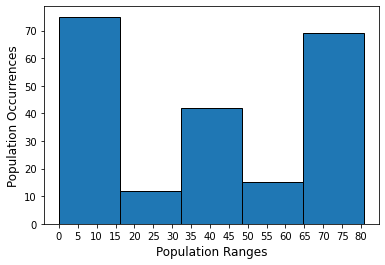

In [44]:
population = euCityTemps['population']
popMax = population.max()
popMin = population.min()
plt.figure(figsize=(6, 4))
plt.hist(population, bins = 5,edgecolor = 'black')
plt.xticks(range(0,int(popMax)+1,5))
plt.xlabel('Population Ranges',fontsize=12)
plt.ylabel('Population Occurrences',fontsize=12)
plt.show()

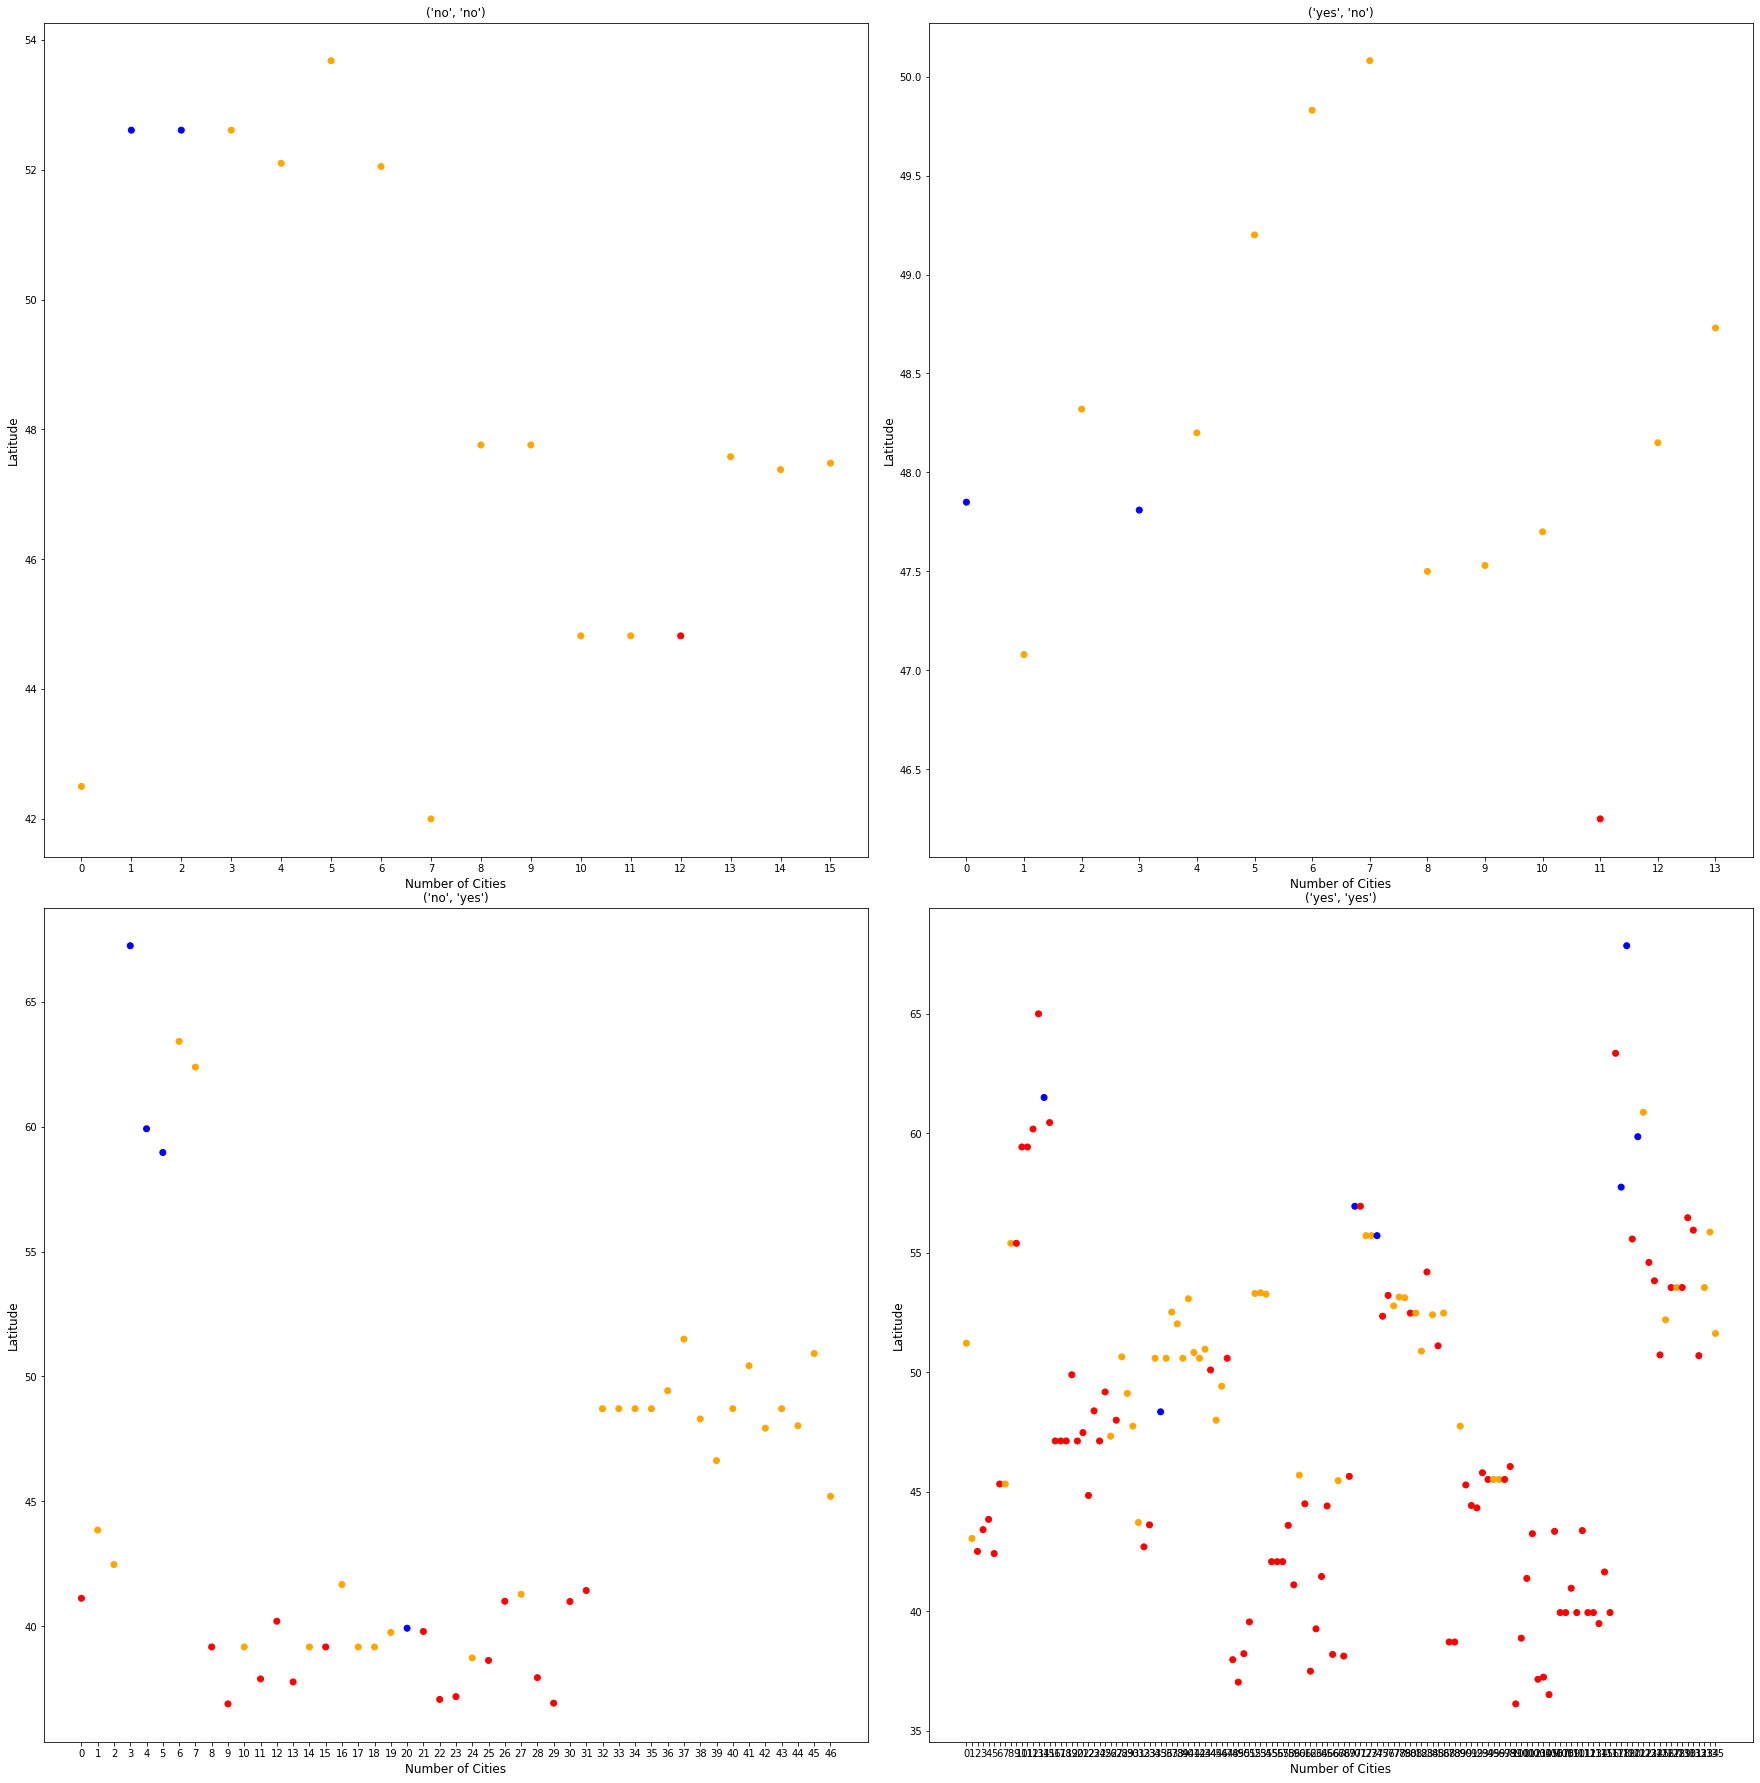

In [67]:
regions= euCityTemps.groupby(['EU','coastline'])
x = y = 0
def changePlot(x,y):
    if(x < 1):
        x+=1
    else:
        x = 0
        y += 1
    return x,y
fig, axes = plt.subplots(2,2,figsize=(25,25))
fig.tight_layout(pad = 3.0)
for name, values in regions:
    temp = values.temperature
    numCities = len(values.city)
    col = np.where(temp>10,'red',(np.where(temp<6,'blue','orange')))
    axes[x][y].scatter(values.city, values.latitude, c = col)
    axes[x][y].set_xticks(range(0,numCities,1))
    axes[x][y].set_xticklabels(range(0,numCities,1))
    axes[x][y].set_title(name)
    axes[x][y].set_xlabel('Number of Cities', fontsize = 12)
    axes[x][y].set_ylabel('Latitude', fontsize = 12)
    x, y = changePlot(x,y)
